In [4]:
import pandas as pd
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt"
data=pd.read_csv(url,sep=' ',names=['calories','sodium','alcohol','cost'],header=None, skiprows=1)
data

,calories,sodium,alcohol,cost
Budweiser,144,15,4.7,0.43
Schlitz,151,19,4.9,0.43
Lowenbrau,157,15,0.9,0.48
Kronenbourg,170,7,5.2,0.73
Heineken,152,11,5.0,0.77
Old_Milwaukee,145,23,4.6,0.28
Augsberger,175,24,5.5,0.40
Srohs_Bohemian_Style,149,27,4.7,0.42
Miller_Lite,99,10,4.3,0.43
Budweiser_Light,113,8,3.7,0.40


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_beer_df=scaler.fit_transform(data[['calories','sodium','alcohol','cost']])

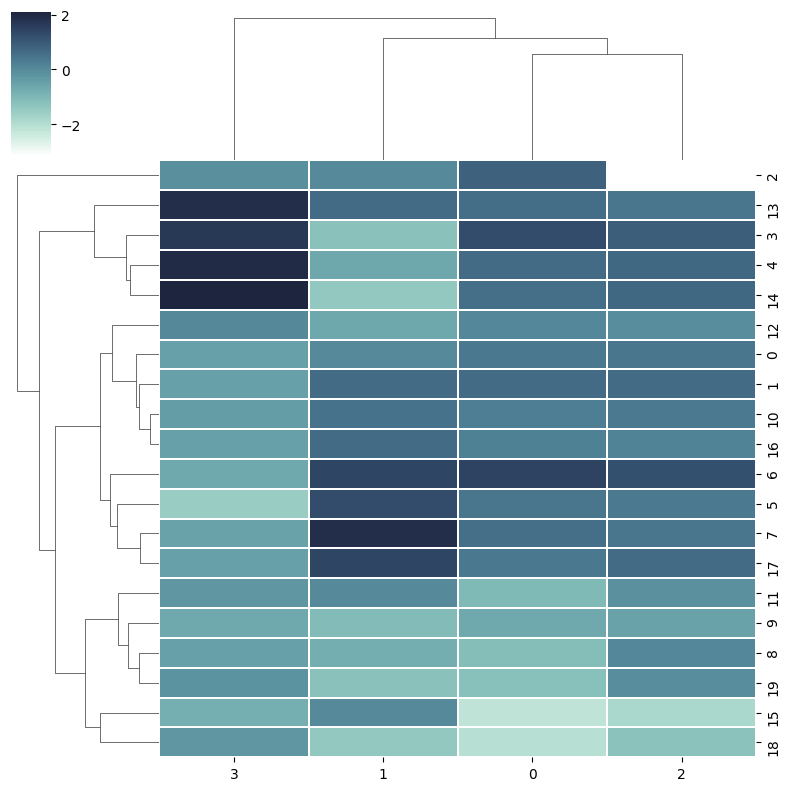

In [6]:
import seaborn as sn
cmap=sn.cubehelix_palette(as_cmap=True,rot=-.3,light=1)
sn.clustermap(scaled_beer_df,cmap=cmap,linewidths=.2,figsize=(8,8))

In [7]:
data.iloc[[10,16]]

,calories,sodium,alcohol,cost
Coors,140,18,4.6,0.44
Hamms,139,19,4.4,0.43


In [8]:
data.iloc[[2,18]]

,calories,sodium,alcohol,cost
Lowenbrau,157,15,0.9,0.48
Olympia_Goled_Light,72,6,2.9,0.46


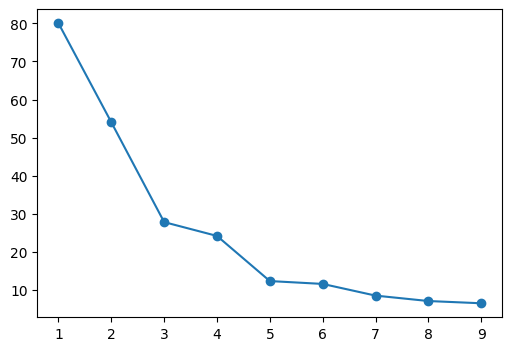

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_beer_df=scaler.fit_transform(data[['calories','sodium','alcohol','cost']])

In [12]:
clusters=KMeans(3,random_state=42)
clusters.fit(scaled_beer_df)
data['clusterid']=clusters.labels_

In [14]:
data[data.clusterid==0]

,calories,sodium,alcohol,cost,clusterid
Budweiser,144,15,4.7,0.43,0
Schlitz,151,19,4.9,0.43,0
Old_Milwaukee,145,23,4.6,0.28,0
Augsberger,175,24,5.5,0.40,0
Srohs_Bohemian_Style,149,27,4.7,0.42,0
Coors,140,18,4.6,0.44,0
Becks,150,19,4.7,0.76,0
Hamms,139,19,4.4,0.43,0
Heilemans_Old_Style,144,24,4.9,0.43,0


In [15]:
data[data.clusterid==1]

,calories,sodium,alcohol,cost,clusterid
Kronenbourg,170,7,5.2,0.73,1
Heineken,152,11,5.0,0.77,1
Miller_Lite,99,10,4.3,0.43,1
Budweiser_Light,113,8,3.7,0.40,1
Coors_Light,102,15,4.1,0.46,1
Michelob_Light,135,11,4.2,0.50,1
Kirin,149,6,5.0,0.79,1
Pabst_Extra_Light,68,15,2.3,0.38,1
Olympia_Goled_Light,72,6,2.9,0.46,1
Schlitz_Light,97,7,4.2,0.47,1


In [17]:
data[data.clusterid==2]

,calories,sodium,alcohol,cost,clusterid
Lowenbrau,157,15,0.9,0.48,2


In [21]:
data[data.cost<0.43]

,calories,sodium,alcohol,cost,clusterid
Old_Milwaukee,145,23,4.6,0.28,0
Augsberger,175,24,5.5,0.40,0
Srohs_Bohemian_Style,149,27,4.7,0.42,0
Budweiser_Light,113,8,3.7,0.40,1
Pabst_Extra_Light,68,15,2.3,0.38,1


In [18]:
print(data)

                      calories  sodium  alcohol  cost  clusterid
Budweiser                  144      15      4.7  0.43          0
Schlitz                    151      19      4.9  0.43          0
Lowenbrau                  157      15      0.9  0.48          2
Kronenbourg                170       7      5.2  0.73          1
Heineken                   152      11      5.0  0.77          1
Old_Milwaukee              145      23      4.6  0.28          0
Augsberger                 175      24      5.5  0.40          0
Srohs_Bohemian_Style       149      27      4.7  0.42          0
Miller_Lite                 99      10      4.3  0.43          1
Budweiser_Light            113       8      3.7  0.40          1
Coors                      140      18      4.6  0.44          0
Coors_Light                102      15      4.1  0.46          1
Michelob_Light             135      11      4.2  0.50          1
Becks                      150      19      4.7  0.76          0
Kirin                    

In [23]:
from sklearn.cluster import AgglomerativeClustering
h_clusters=AgglomerativeClustering(3)
h_clusters.fit(scaled_beer_df)
data['h_clusterid']=h_clusters.labels_

In [26]:
data[data.h_clusterid==2]

,calories,sodium,alcohol,cost,clusterid,h_clusterid
Kronenbourg,170,7,5.2,0.73,1,2
Heineken,152,11,5.0,0.77,1,2
Becks,150,19,4.7,0.76,0,2
Kirin,149,6,5.0,0.79,1,2


from matplotlib import pyplot as plt
_df_0['calories'].plot(kind='hist', bins=20, title='calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sodium'].plot(kind='hist', bins=20, title='sodium')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['alcohol'].plot(kind='hist', bins=20, title='alcohol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cost'].plot(kind='hist', bins=20, title='cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='calories', y='sodium', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sodium', y='alcohol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='alcohol', y='cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='cost', y='clusterid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['h_clusterid']
  ys = series['calories']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('h_clusterid', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('h_clusterid')
_ = plt.ylabel('calories')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['h_clusterid']
  ys = series['sodium']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('h_clusterid', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('h_clusterid')
_ = plt.ylabel('sodium')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['h_clusterid']
  ys = series['alcohol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('h_clusterid', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('h_clusterid')
_ = plt.ylabel('alcohol')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['h_clusterid']
  ys = series['cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('h_clusterid', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('h_clusterid')
_ = plt.ylabel('cost')

from matplotlib import pyplot as plt
_df_12['calories'].plot(kind='line', figsize=(8, 4), title='calories')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['sodium'].plot(kind='line', figsize=(8, 4), title='sodium')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['alcohol'].plot(kind='line', figsize=(8, 4), title='alcohol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['cost'].plot(kind='line', figsize=(8, 4), title='cost')
plt.gca().spines[['top', 'right']].set_visible(False)